In [6]:
import tensorflow as tf

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


170498071/170498071 [==============================] - 19s 0us/step


In [8]:
split_ratio = 0.8
split_index = int(len(x_train) * split_ratio)

x_train_split = x_train[:split_index]
y_train_split = y_train[:split_index]

x_val = x_train[split_index:]
y_val = y_train[split_index:]

In [9]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 5s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
batch_size = 128
epochs = 10
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 476s 2s/step - loss: 1.6187 - accuracy: 0.4327 - val_loss: 1.3363 - val_accuracy: 0.5352
Epoch 2/10
313/313 [==============================] - 475s 2s/step - loss: 1.3500 - accuracy: 0.5265 - val_loss: 1.2467 - val_accuracy: 0.5615
Epoch 3/10
313/313 [==============================] - 479s 2s/step - loss: 1.2809 - accuracy: 0.5539 - val_loss: 1.2093 - val_accuracy: 0.5797
Epoch 4/10
313/313 [==============================] - 1011s 3s/step - loss: 1.2356 - accuracy: 0.5666 - val_loss: 1.1821 - val_accuracy: 0.5834
Epoch 5/10
313/313 [==============================] - 464s 1s/step - loss: 1.1996 - accuracy: 0.5804 - val_loss: 1.1686 - val_accuracy: 0.5935
Epoch 6/10
313/313 [==============================] - 5493s 18s/step - loss: 1.1856 - accuracy: 0.5842 - val_loss: 1.1504 - val_accuracy: 0.5966
Epoch 7/10
313/313 [==============================] - 470s 2s/step - loss: 1.1645 - accuracy: 0.5948 - val_loss: 1.1428 - val_accuracy: 0.6

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 [==============================] - 45680s 146s/step - loss: 1.1371 - accuracy: 0.5987
Test Loss: 1.1371
Test Accuracy: 59.87%


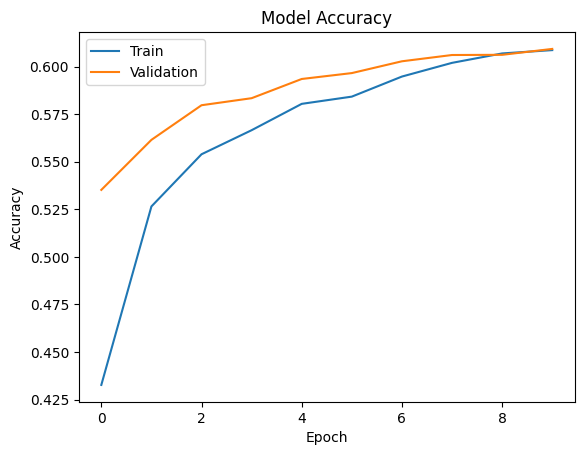

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 89s 279ms/step - loss: 1.6689 - accuracy: 0.3952 - val_loss: 1.2782 - val_accuracy: 0.5505
Epoch 2/10
313/313 [==============================] - 90s 287ms/step - loss: 1.3135 - accuracy: 0.5352 - val_loss: 1.1309 - val_accuracy: 0.6085
Epoch 3/10
313/313 [==============================] - 87s 279ms/step - loss: 1.1842 - accuracy: 0.5827 - val_loss: 1.0593 - val_accuracy: 0.6339
Epoch 4/10
313/313 [==============================] - 87s 279ms/step - loss: 1.1127 - accuracy: 0.6094 - val_loss: 0.9844 - val_accuracy: 0.6584
Epoch 5/10
313/313 [==============================] - 93s 296ms/step - loss: 1.0425 - accuracy: 0.6327 - val_loss: 0.9633 - val_accuracy: 0.6646
Epoch 6/10
313/313 [==============================] - 99s 317ms/step - loss: 0.9913 - accuracy: 0.6491 - val_loss: 0.9412 - val_accuracy: 0.6701
Epoch 7/10
313/313 [==============================] - 88s 280ms/step - loss: 0.9436 - accuracy: 0.6677 - val_loss: 0.9145 - val_ac

In [18]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"CNN Model - Test Loss: {cnn_loss:.4f}")
print(f"CNN Model - Test Accuracy: {cnn_accuracy*100:.2f}%")

313/313 [==============================] - 5s 17ms/step - loss: 0.9108 - accuracy: 0.6837
CNN Model - Test Loss: 0.9108
CNN Model - Test Accuracy: 68.37%


In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

In [21]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='softmax'))
transfer_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 336s 1s/step - loss: 1.6092 - accuracy: 0.4349 - val_loss: 1.3342 - val_accuracy: 0.5379
Epoch 2/10
313/313 [==============================] - 309s 987ms/step - loss: 1.3538 - accuracy: 0.5298 - val_loss: 1.2530 - val_accuracy: 0.5639
Epoch 3/10
313/313 [==============================] - 268s 858ms/step - loss: 1.2839 - accuracy: 0.5502 - val_loss: 1.2126 - val_accuracy: 0.5732
Epoch 4/10
313/313 [==============================] - 307s 981ms/step - loss: 1.2404 - accuracy: 0.5671 - val_loss: 1.1816 - val_accuracy: 0.5864
Epoch 5/10
313/313 [==============================] - 269s 858ms/step - loss: 1.2087 - accuracy: 0.5807 - val_loss: 1.1608 - val_accuracy: 0.5924
Epoch 6/10
313/313 [==============================] - 270s 864ms/step - loss: 1.1832 - accuracy: 0.5871 - val_loss: 1.1559 - val_accuracy: 0.5942
Epoch 7/10
313/313 [==============================] - 268s 856ms/step - loss: 1.1593 - accuracy: 0.5929 - val_loss: 1.1460 - va

In [22]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(x_test, y_test)
print(f"Transfer Learning Model - Test Loss: {transfer_loss:.4f}")
print(f"Transfer Learning Model - Test Accuracy: {transfer_accuracy*100:.2f}%")

313/313 [==============================] - 102s 325ms/step - loss: 1.1318 - accuracy: 0.6030
Transfer Learning Model - Test Loss: 1.1318
Transfer Learning Model - Test Accuracy: 60.30%


In [24]:
transfer_predictions = transfer_model.predict(x_test)
transfer_labels = np.argmax(y_test, axis=1)
transfer_predictions = np.argmax(transfer_predictions, axis=1)

313/313 [==============================] - 103s 328ms/step


In [27]:
!pip show scikit-learn


In [28]:
!pip install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 5.1 MB/s eta 0:00:00


In [30]:
import sklearn

In [31]:
from sklearn import metrics

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
transfer_report = classification_report(transfer_labels, transfer_predictions)
transfer_confusion = confusion_matrix(transfer_labels, transfer_predictions)

In [33]:
print("Transfer Learning Model Evaluation Metrics:")
print(transfer_report)
print("Transfer Learning Model Confusion Matrix:")
print(transfer_confusion)

Transfer Learning Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1000
           1       0.60      0.75      0.66      1000
           2       0.52      0.50      0.51      1000
           3       0.47      0.41      0.43      1000
           4       0.60      0.48      0.54      1000
           5       0.51      0.55      0.53      1000
           6       0.63      0.67      0.65      1000
           7       0.66      0.66      0.66      1000
           8       0.74      0.69      0.72      1000
           9       0.62      0.63      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000

Transfer Learning Model Confusion Matrix:
[[684  46  66  14   7  18   8  24  96  37]
 [ 28 747  11  29   8  22  16  18  22  99]
 [ 75  30 503  55  91  84  87  48  13  14]
 [ 20  57  74 407  38 169 

In [35]:
cnn_predictions = cnn_model.predict(x_test)
cnn_labels = np.argmax(y_test, axis=1)
cnn_predictions = np.argmax(cnn_predictions, axis=1)

313/313 [==============================] - 10s 32ms/step


In [36]:
cnn_report = classification_report(cnn_labels, cnn_predictions)
cnn_confusion = confusion_matrix(cnn_labels, cnn_predictions)


In [37]:
print("CNN Model Evaluation Metrics:")
print(cnn_report)
print("CNN Model Confusion Matrix:")
print(cnn_confusion)

CNN Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.79      0.80      0.79      1000
           2       0.56      0.56      0.56      1000
           3       0.53      0.46      0.49      1000
           4       0.66      0.59      0.62      1000
           5       0.59      0.60      0.60      1000
           6       0.71      0.80      0.75      1000
           7       0.63      0.81      0.71      1000
           8       0.86      0.74      0.80      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

CNN Model Confusion Matrix:
[[697  26  66  32  23   4  17  23  62  50]
 [ 18 802  10  11   7   9  14   9  12 108]
 [ 56   9 563  49  76  89  78  63   8   9]
 [ 20   8  84 458  62 191  87  70   7  13]
 [ 20   4  

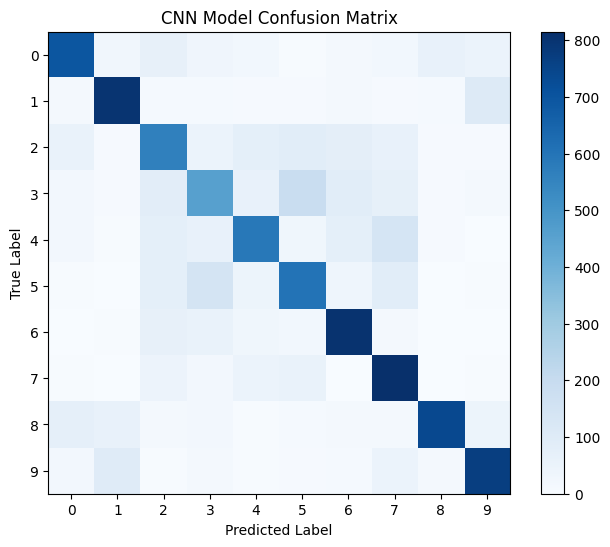

In [38]:
plt.figure(figsize=(8, 6))
plt.imshow(cnn_confusion, cmap=plt.cm.Blues)
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

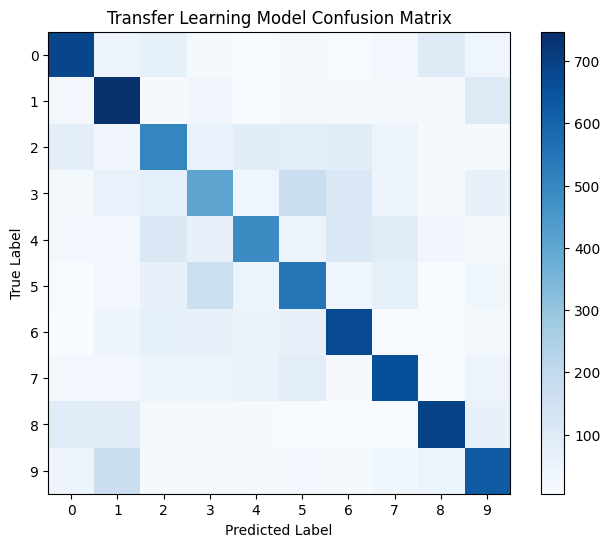

In [39]:
plt.figure(figsize=(8, 6))
plt.imshow(transfer_confusion, cmap=plt.cm.Blues)
plt.title('Transfer Learning Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

In [40]:
metrics_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Test Loss': [cnn_loss, transfer_loss],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

In [41]:
print("Evaluation Metrics:")
print(metrics_table)

Evaluation Metrics:
                     Model  Test Loss  Test Accuracy
0                CNN Model   0.910843         0.6837
1  Transfer Learning Model   1.131777         0.6030


In [43]:
cnn_train_loss, cnn_train_acc = cnn_model.evaluate(x_train, y_train)
print(f"CNN Model - Training Loss: {cnn_train_loss:.4f}")
print(f"CNN Model - Training Accuracy: {cnn_train_acc*100:.2f}%")

1563/1563 [==============================] - 44s 28ms/step - loss: 0.6295 - accuracy: 0.7902
CNN Model - Training Loss: 0.6295
CNN Model - Training Accuracy: 79.02%


In [45]:
transfer_train_loss, transfer_train_acc = transfer_model.evaluate(x_train, y_train)
print(f"Transfer Learning Model - Training Loss: {transfer_train_loss:.4f}")
print(f"Transfer Learning Model - Training Accuracy: {transfer_train_acc*100:.2f}%")

1563/1563 [==============================] - 456s 290ms/step - loss: 1.0261 - accuracy: 0.6447
Transfer Learning Model - Training Loss: 1.0261
Transfer Learning Model - Training Accuracy: 64.47%


In [48]:
performance_table = pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Training Accuracy': [cnn_train_acc, transfer_train_acc],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})

print("Model Performance on Training and Testing Sets:")
print(performance_table)

Model Performance on Training and Testing Sets:
                     Model  Training Accuracy  Test Accuracy
0                CNN Model            0.79020         0.6837
1  Transfer Learning Model            0.64468         0.6030
